Prepare

In [ ]:
!pip install diffusers==0.4.0
!pip install transformers==4.17.0 scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

from huggingface_hub import notebook_login

notebook_login()

Read captions from a text file

In [ ]:
with open('clipInterrogatorCaps.txt') as file:
    captions = [line.rstrip() for line in file]

Stable diffusion

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")#, revision="fp16", torch_dtype=torch.float16)  
pipe = pipe.to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

The config attributes {'clip_sample': False} were passed to PNDMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [ ]:
from torch import autocast

Generate images

In [ ]:
with autocast('cuda', torch.float16):
  generated_images = []
  i=0
  for caption in captions:
    prompt = caption # The caption is wrapped in a single item list
    #prompt = "a woman standing in front of a store filled with bread, a pastel, by Rumiko Takahashi, aestheticism, rabbit robot, films, protagonist in foreground, breakcore, cheese, in rows, heavy filmgrain, the blessed aisles, sad kawaii face, maid, streaming on twitch, asthetic, as far as the eye can see"
    #print(prompt)
    image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

    # Now to display an image you can do either save it such as:
    image.save("test"+str(i)+".png")

    # or if you're in a google colab you can directly display it with 
    generated_images.append(image)
    i+=1

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Display images with captions

a painting of a giant red robot with green eyes, concept art by Michael Komarck, zbrush central contest winner, nuclear art, redshift, parallax, concept art


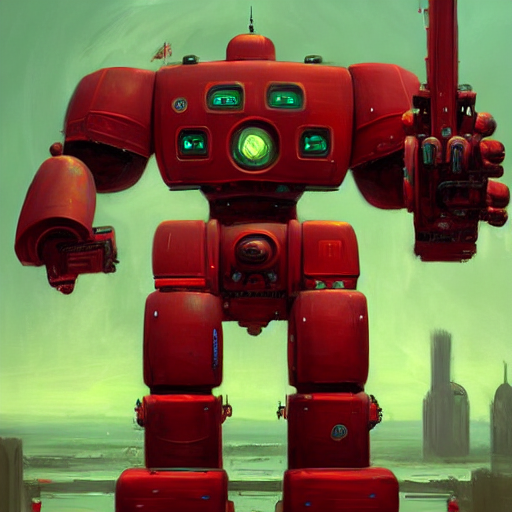

a painting of a cemetery with a cemetery in the foreground, a detailed matte painting by Michael James Smith, deviantart, gothic art, matte painting, gothic, matte drawing


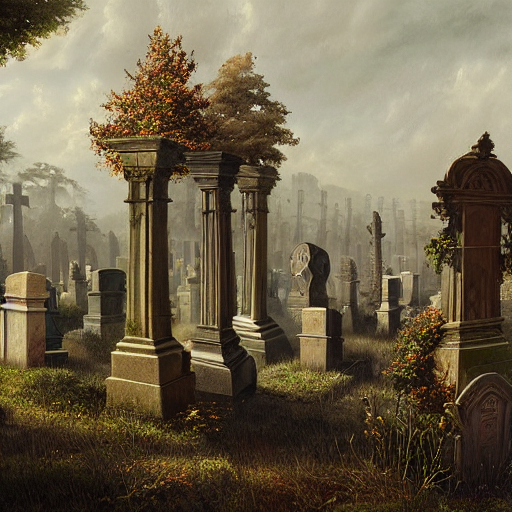

an alien creature with red eyes and teeth, an ambient occlusion render by Xul Solar, featured on zbrush central, photorealism, zbrush, hard surface modeling, rendered in maya


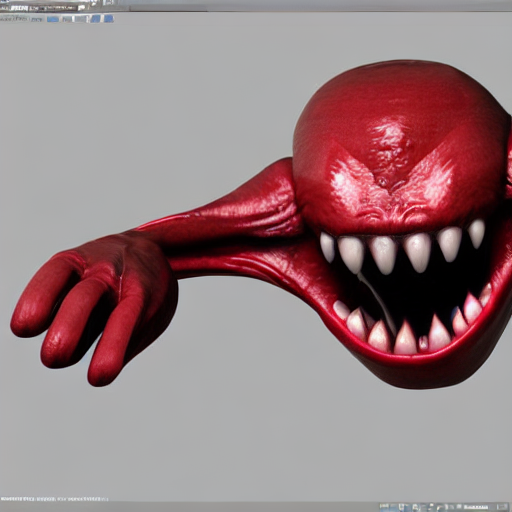

a close up of an alien creature with large teeth, an ambient occlusion render by senior character artist, trending on zbrush central, sots art, zbrush, unreal engine 5, sketchfab


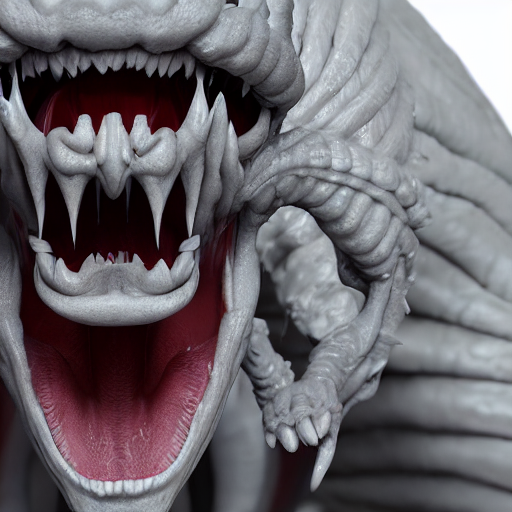

a painting of a factory with smoke coming out of it, a detailed matte painting by Cedric Peyravernay, cgsociety, fantastic realism, cryengine, matte painting, dystopian art


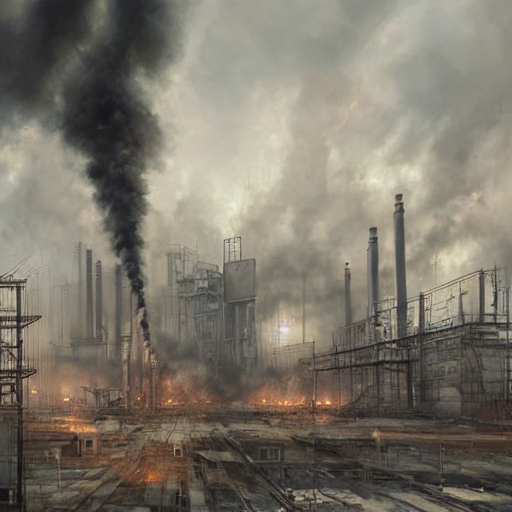

an abandoned building with a ferris wheel in the background, a detailed matte painting by Fyodor Vasilyev, cgsociety, nuclear art, matte painting, apocalypse landscape, apocalypse art


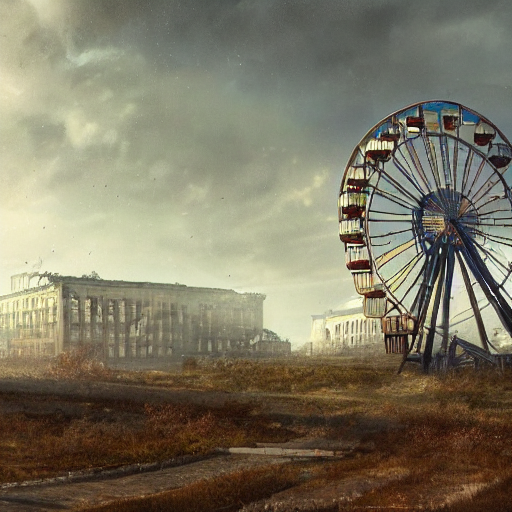

a demonic looking creature with glowing eyes and horns, a character portrait by Xul Solar, zbrush central, sots art, unreal engine 5, zbrush, darksynth


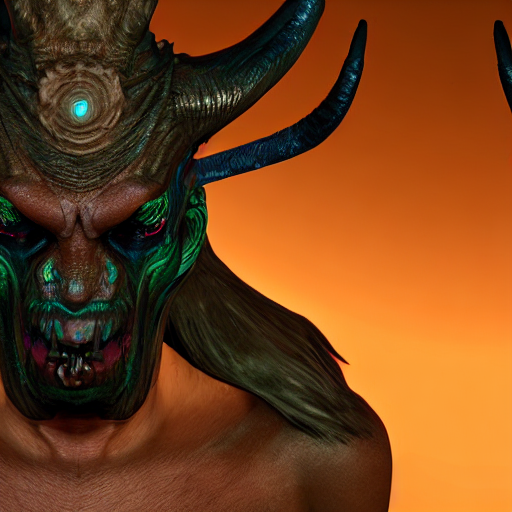

a digital painting of a city at night, cyberpunk art by Kilian Eng, cgsociety, cubo-futurism, greeble, circuitry, synthwave


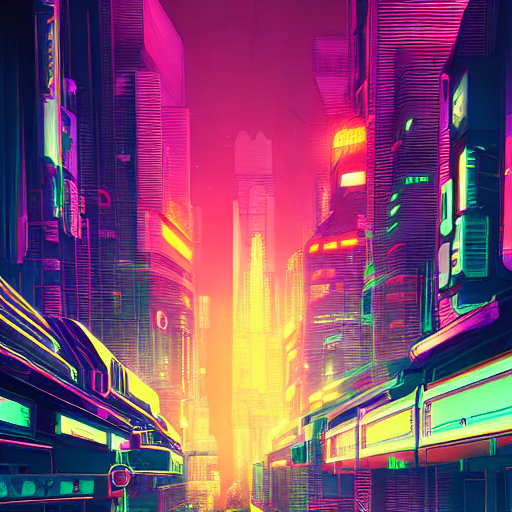

a room that has a bunch of wires on the floor, concept art by Wayne Barlowe, cgsociety, assemblage, dystopian art, concept art, official art


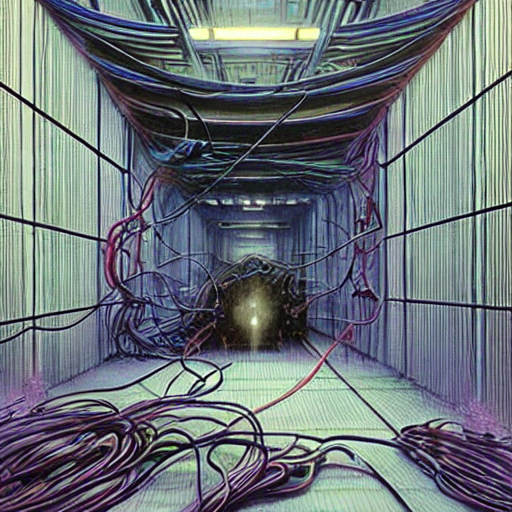

a painting of a building with icicles hanging from it, a detailed matte painting by Jon Foster, cgsociety, fantastic realism, matte painting, dystopian art, matte drawing


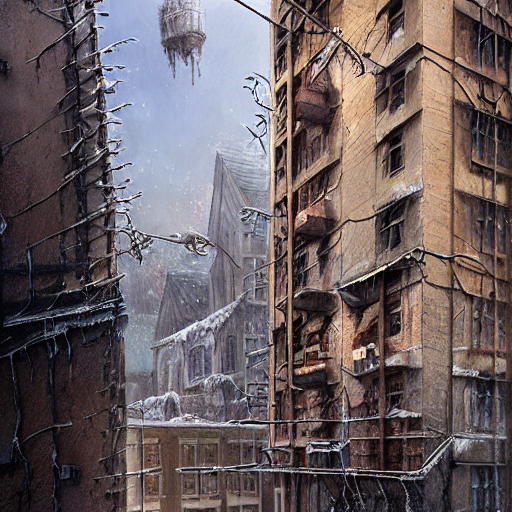

In [ ]:
for i in range(len(captions)):
  print(captions[i])
  display(generated_images[i])

Save images and captions

In [ ]:
for i in range(len(generated_images)):
  generated_images[i].save("ClipInt2StableDiffusion"+str(i)+".png")

In [ ]:
import pandas as pd

In [ ]:
d = {'captions': captions}

df = pd.DataFrame(data=d)
df.to_csv("clip_int_captions.csv")